<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Geoscience visualization with Matplotlib and CartoPy</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://scitools.org.uk/cartopy/docs/latest/_images/barbs_00_00.png" alt="Example Map Image" style="height: 300px;"></div>

- Sophisticated 2D and 3D plotting library.
- We'll give you a taste of the possibilities, but covering < 1%.
- Mature and can produce publication quality graphics.
- Static images, nothing interactive yet.
- We'll focus on geoscience, but matplotlib can likely meet most of your scientific plotting requirements.
- The best is to find an example of what you want in a [gallery](http://matplotlib.org/gallery.html) and emulate that.


## Some CartoPy examples to whet your appetite

Reference: http://scitools.org.uk/cartopy/docs/latest/gallery.html

![Basic Map](http://scitools.org.uk/cartopy/docs/latest/_images/global_map_00_00.png)

![Barbs Map](http://scitools.org.uk/cartopy/docs/latest/_images/barbs_00_00.png)

![Contour Map](http://scitools.org.uk/cartopy/docs/latest/_images/waves_00_00.png)

## Plotting netCDF data

### Basic Plot

- Plotting temperature as a function of depth as predicted by the RTOFS model

In [1]:
# Importing libraries we will need.
import netCDF4
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Open the netCDF file
f = netCDF4.Dataset('../../data/rtofs_glo_3dz_f006_6hrly_reg3.nc', 'r')

# Getting the n-dimensional data
tempv = f.variables['temperature']
depth = f.variables['Depth']

print("The temperature variable...\n")
# Note the temperature variable has time, depth, y and x dimensions
print(tempv)
print("The dimensions...\n")
print(tempv.dimensions)

The temperature variable...

<class 'netCDF4._netCDF4.Variable'>
float32 temperature(MT, Depth, Y, X)
    coordinates: Longitude Latitude Date
    standard_name: sea_water_potential_temperature
    units: degC
    _FillValue: 1.26765e+30
    valid_range: [ -5.07860279  11.14989948]
    long_name:   temp [90.9H]
unlimited dimensions: MT
current shape = (1, 10, 850, 712)
filling on
The dimensions...

('MT', 'Depth', 'Y', 'X')


The masked array containing the temperature data...
masked_array(data = [6.485864639282227 4.6258392333984375 4.010849952697754 3.8229074478149414
 3.4448373317718506 2.8652758598327637 1.785945177078247 1.333146333694458
 -- --],
             mask = [False False False False False False False False  True  True],
       fill_value = 1.26765e+30)



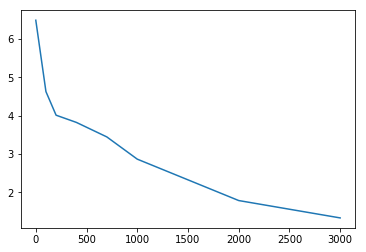

In [3]:
# Continued from previous cell..

# Our goal is temperature as a function of depth so slicing along the depth axis
# at a specific time and place
temp = tempv[0, :, 123, 486]

# Masked arrays are arrays that have bad values idenitifed by the mask array.
print("The masked array containing the temperature data...")
print(repr(temp))

# trick for filtering out good values
x = temp[~temp.mask] 
y = depth[~temp.mask]

# plot and show data
plt.plot(y, x)

# close netCDF
f.close()

### Let's build upon the previous plot into something that is ready for publication.

- Title
- Axis Legends
- Markers

[Peruse matplotlib gallery](http://matplotlib.org/gallery.html) and see and 
emulate what you like.

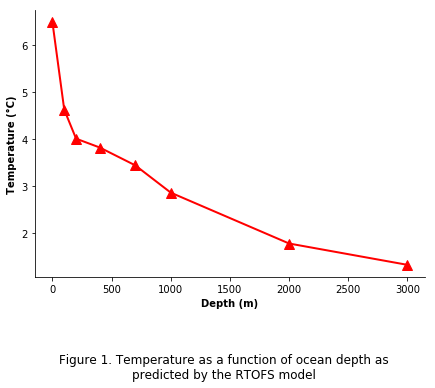

In [4]:
# Adding text, adjusting borders, and figure size
# Get figure hook to manipulate our plot
fig = plt.figure()
desc ='Figure 1. Temperature as a function of ocean depth as\n'\
    'predicted by the RTOFS model'
# Adding our description
plt.figtext(.5, .15, desc, fontsize=12, ha='center')
#adjust margin
fig.subplots_adjust(bottom=0.35)
#adjust figure size
fig.set_size_inches(7, 7)

# Improve axes
# Get axis hook to manipulate our plot
ax = fig.add_subplot(1, 1, 1)
# Add axis labels
ax.set_xlabel('Depth (m)', fontweight='bold')
# \u00b0 : degree symbol
ax.set_ylabel(u'Temperature (\u00b0C)', fontweight='bold')
# Don't show top and right axis
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# Define ticks
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom() # remove unneeded ticks 
ax.get_yaxis().tick_left()

# Getting the data as we did before
f = netCDF4.Dataset('../../data/rtofs_glo_3dz_f006_6hrly_reg3.nc', 'r')
tempv = f.variables['temperature']
depth = f.variables['Depth']
temp = tempv[0,:,123,486]
x = temp[~temp.mask] #trick for getting data
y = depth[~temp.mask]

# Plotting line with triangle markers, and red line color.
plt.plot(y, x, marker=r'^', color='r', markersize=10,
         clip_on=False, linewidth=2.0)
plt.show()
f.close()

## *Exercise*

- Create a new notebook cell here.
- Based on cell above, plot salinity as a function of depth.
- Try using a different marker.
- Try using a different line color.


# CartoPy

- High level API for dealing with maps
- CartoPy allows you to plot data on a 2D map.
- Support many different map projections
- Support for shapefiles from the GIS world

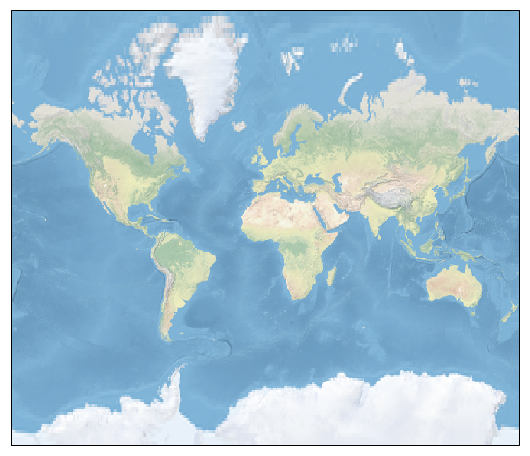

In [5]:
# Importing CartoPy
import cartopy
ccrs = cartopy.crs

# Works with matplotlib's built-in transform support.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Sets the extent to cover the whole globe
ax.set_global()

# Adds standard background map
ax.stock_img()

Cartopy also has a lot of built-in support for a variety of map features:

/Users/johnleeman/anaconda/envs/unidata-workshop/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


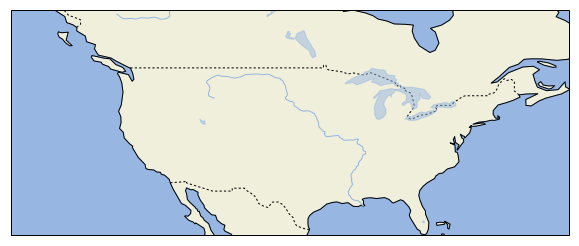

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add variety of features
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# Set limits in lat/lon space
ax.set_extent([-140, -60, 25, 50])

You can also grab other features from the Natural Earth project: http://www.naturalearthdata.com/

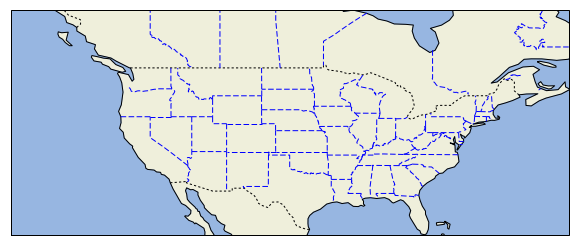

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Grab state borders
state_borders = cartopy.feature.NaturalEarthFeature(
    category='cultural', name='admin_1_states_provinces_lakes',
    scale='50m', facecolor='none') 

ax.add_feature(state_borders, linestyle="--", edgecolor='blue')

# Set limits in lat/lon space
ax.set_extent([-140, -60, 25, 50])

You can also use Cartopy's built in shapefile reader (built on `pyshp`) to read geometry from shapefile and plot.

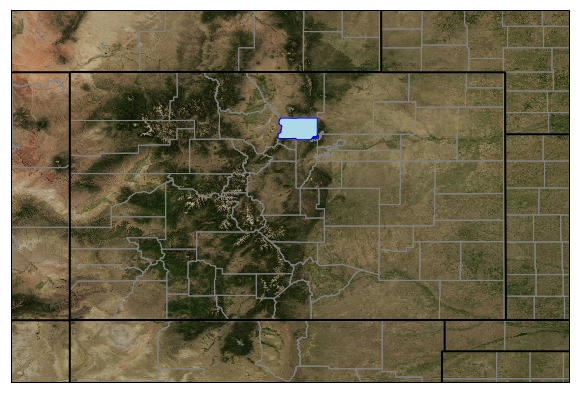

In [8]:
fig = plt.figure(figsize=(10, 8))
#proj = ccrs.LambertConformal(central_latitude=40,
#                             central_longitude=-105)
proj = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Open counties shapefile and plot geometry
counties = cartopy.io.shapereader.Reader('../../data/counties.shp')
ax.add_geometries(counties.geometries(), ccrs.PlateCarree(),
                  edgecolor='grey', facecolor='None')

# Find Boulder county and plot
boulder = [county.geometry for county in counties.records()
           if county.attributes['NAME'] == 'Boulder']
ax.add_geometries(boulder, ccrs.PlateCarree(),
                  edgecolor='blue', facecolor='lightblue')

# Re-use state borders from above
ax.add_feature(state_borders, edgecolor='black', linewidth=2)

# Add topo
im = plt.imread('../../data/colorado_blue_marble.jpg')
ax.imshow(im, interpolation='None', extent=(-110, -101, 36, 42),
          transform=ccrs.PlateCarree())

# Set limits in lat/lon space
ax.set_extent([-110, -101, 36, 42])

- Plotting data works with the set projection by specifying the transform for the data when plotting.
- CartoPy will take care of any needed interpolation and transformation.
- Two lat/lon source projections:
  - Plate Carree projection (Equi-rectangular projection) not on sphere
  - Geodetic projection treats points as on the sphere

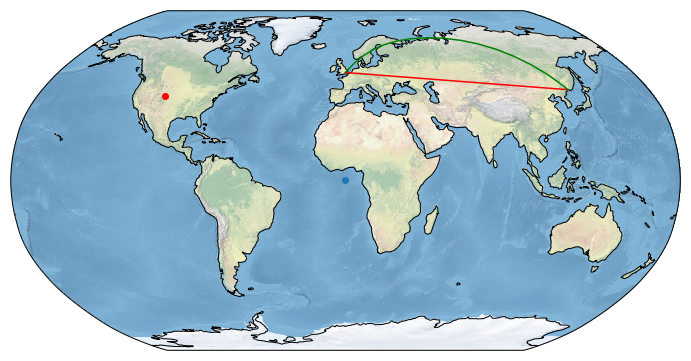

In [9]:
# This shows the difference between Geodetic and Plate Carree
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()
ax.coastlines()

# Plot circle with and without specifying the transform
ax.plot(-105.295175, 40.013176, 'o')
ax.plot(-105.295175, 40.013176, 'ro', transform=ccrs.Geodetic())

# Plot line between two points using both equi-rectangular and geodetic
plt.plot([-0.08, 132.], [51.53, 43.17], 'r',
         transform=ccrs.PlateCarree())
plt.plot([-0.08, 132.], [51.53, 43.17], 'g',
         transform=ccrs.Geodetic())

## Exercise

Try it yourself: Let's look at those curved flight paths on a map
- Pick any projection
- Plot a map of the United States with borders, coastlines, and state borders.
- Plot lines between Seattle, WA and Orlando, FL
    - Plot one straight line on the map (assuming lat/lon are rectangular coordinates)
    - Plot same points assuming they come from a sphere

### Let's plot some data from RTOFS model on a map

- Data are coming from the local file system

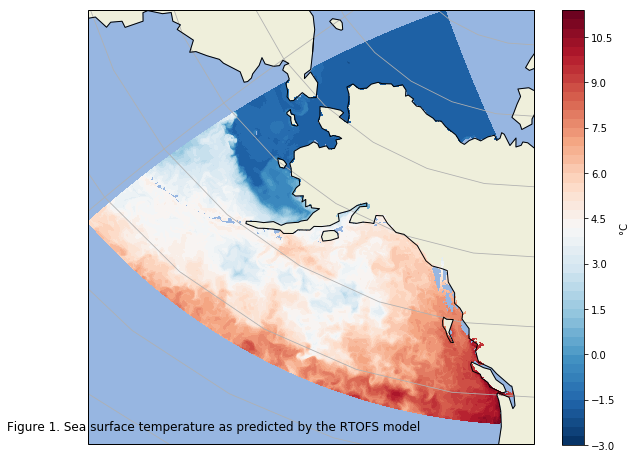

In [10]:
# Open and read netCDF variables
nc = netCDF4.Dataset('../../data/rtofs_glo_3dz_f006_6hrly_reg3.nc', 'r')
tempv = nc.variables['temperature']
lat = nc.variables['Latitude'][:]
lon = nc.variables['Longitude'][:]
data = tempv[0, 0, :, :]

# Set up a stereographic projection
proj = ccrs.Stereographic(central_latitude=60.,
                          central_longitude=-120.)

# Construct figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Setting the plot size and text
plt.figtext(.3, .15,
            'Figure 1. Sea surface temperature as predicted'
            ' by the RTOFS model',
            fontsize=12, ha='center')

# define color map
cmap = plt.cm.RdBu_r

# Nice high-level, human-readable abstractions for dealing with maps.
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(zorder=3)
ax.gridlines()

# Color-filled contour plot
cs = ax.contourf(lon, lat, data, 50, cmap=cmap,
                 transform=ccrs.PlateCarree(), zorder=2)

# Color bar
cbar = plt.colorbar(cs)
cbar.set_label(u'\u00b0C')

nc.close()

## *Exercise*

- Create a new notebook cell here.
- Based on cell above, create a plot showing salinity on map.
- Try a different [projection](http://matplotlib.org/basemap/users/mapsetup.html).
- Try a different [color map](http://matplotlib.org/api/pyplot_summary.html#matplotlib.pyplot.colormaps) [(examples)](http://matplotlib.org/examples/pylab_examples/show_colormaps.html).

# Accessing and plotting data from the TDS

### SST and ICE

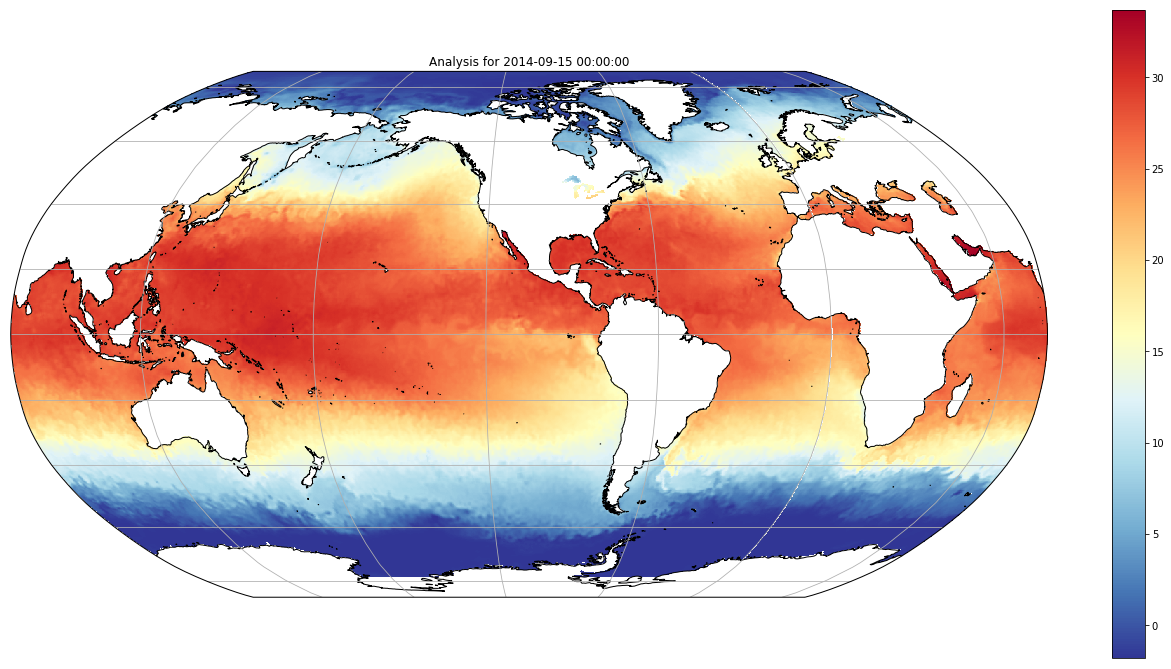

In [11]:
from datetime import datetime
date = datetime(2014, 9, 15, 0) # date to plot.

# open dataset.
#url = 'http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg'
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Aggregations/OISSThires/sst.mean.nc'
dataset = netCDF4.Dataset(url)
timevar = dataset.variables['time']

# find time index for desired date.
timeindex = netCDF4.date2index(date, timevar)

# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex, :].squeeze()

# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

# create figure, axes instances.
fig = plt.figure(figsize=(20, 10))
proj = ccrs.Robinson(central_longitude=-105.)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9], projection=proj)

# plot sst--this relies on evenly spaced points
bounds = (lons[0], lons[-1], lats[0], lats[-1])
im1 = ax.imshow(sst, extent=bounds, interpolation='nearest',
                cmap='RdYlBu_r',
                transform=ccrs.PlateCarree())

# Add gridlines and coastlines
ax.gridlines()
ax.coastlines('50m')

# add colorbar
plt.colorbar(im1)

# add a title.
ax.set_title('Analysis for %s' % date)

### Exercise

- Modify the last example to add the sea ice analysis to the plot
- Try a different projection